In this notebook we use Python to draw maps of every single country in the world, as well as a map of the EU

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Standard python library. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd

# preparation

## country dictionary

In [3]:
iso_to_wb = pd.read_csv("https://raw.githubusercontent.com/adrivsh/country_names/master/iso3_to_wb_name.csv", index_col="iso3")
iso_to_wb.head()

,country
iso3,
ABW,Aruba
AFG,Afghanistan
AGO,Angola
AIA,Anguilla
ALB,Albania


In [4]:
from replace_with_warning import replace_with_warning

## Mapping libraries

The following library, coded for this project, allows to plot maps. It produces [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps, that can be visualized in a browser, out of the box. 

It can also automatically transform those SVG maps into [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics) maps, provided the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. 
Finally, to automatically merge the map and the legend in a single file, it requires [ImageMagick](http://www.imagemagick.org/script/index.php).




In [5]:
from maps_lib import * 

In [6]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

## Base world map

In [ ]:
#Basemap to use

# svg_to_use = "FRA_guyana_ok"
svg_to_use = "new_SVG_should_be_great"

In [8]:
from tempfile import mkstemp
from shutil import move
from os import remove, close

def replace(file_path, new_path, pattern, subst):
    #Create temp file
    fh, abs_path = mkstemp()
    
    #actually replaces text line by line
    with open(abs_path,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    
    #closes the temporary file
    close(fh)
    #Move temp to new file
    move(abs_path, new_path)

if svg_to_use == "Boundaries_in_asia_and_more_detail":
        #copies from map with french guyana to new one, with smaller (less thick) boundaries    
    replace("world-original.svg","world-original_thin.svg",".5px",".25px")
elif svg_to_use == "FRA_guyana_ok":    
    #copies from map with french guyana to new one, with smaller (less thick) boundaries    
    replace("world-fra.svg","world-original_thin.svg",".5px",".25px")
elif svg_to_use== "new_SVG_should_be_great":
    replace("world-unsimplified.svg","world-original_thin.svg",".5px",".25px") 
else:
    error, "use one of the above options"
    
    
#changes the colors of the boundaries and fill 

replace("world-original_thin.svg","world-original_thin.svg",
        '<rect class="rectangle" width="100%" height="100%" fill="#6ec8bb" />','')


#folder where to store the pdf
outfolder_name = os.path.join(svg_to_use,"")
print(outfolder_name)
os.makedirs(outfolder_name, exist_ok=True)


new_SVG_should_be_great\


# poverty exposure bias maps

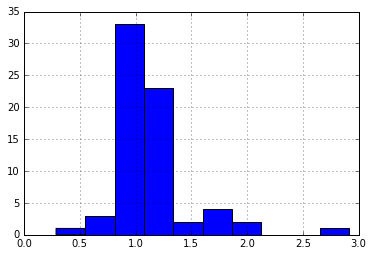

In [9]:
peb = pd.read_excel("peb.xlsx", index_col="iso").peb
peb.hist()

In [10]:
 (peb<.95).sum(), (peb<1).sum(),(peb>1).sum(), (peb>1.05).sum()

(15, 23, 45, 34)

In [11]:
peb.quantile(np.arange(0,1,1/10))

0.0    0.287535
0.1    0.865448
0.2    0.947994
0.3    0.990173
0.4    1.011977
0.5    1.046422
0.6    1.097675
0.7    1.199124
0.8    1.265616
0.9    1.514810
Name: peb, dtype: float64

# 5 bins

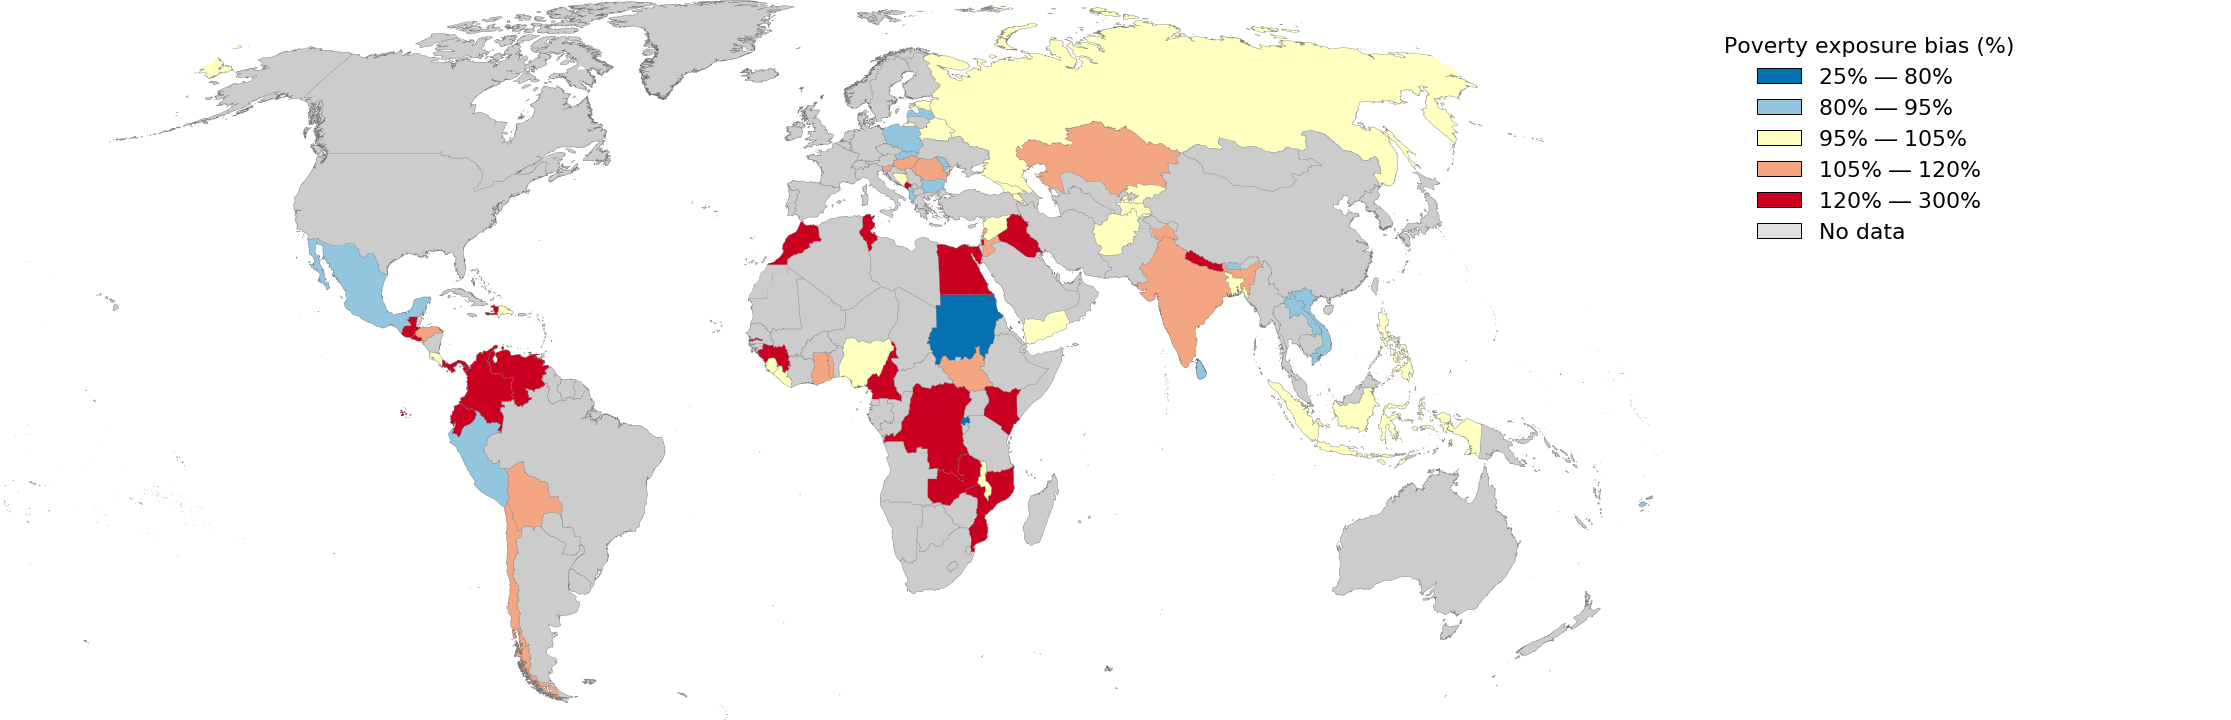

In [12]:

mybins   = [0.25, 0.8, .95, 1.05, 1.2, 3]
#we chose bins thare are close to the actual quatiles but make sense when reading by a human

mycolors = ["#ca0020", "#f4a582", "#ffffbf", "#92c5de", "#0571b0"]
mycolors.reverse() # 5-class RdBu_r


make_map_from_svg(
        series_in=peb, #data 
        svg_file_path="world-original_thin.svg",    #path to blank map
#         svg_file_path  = "world-color.svg",
        outname="peb_5bins",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
        bins = mybins,
        bincolors = mycolors,
        label="Poverty exposure bias (%)",
        outfolder=outfolder_name,
        formater = ".0%",
        verbose=True,
        doPNG=True,
        keepSVG=True
    )
    
    

# 4 bins

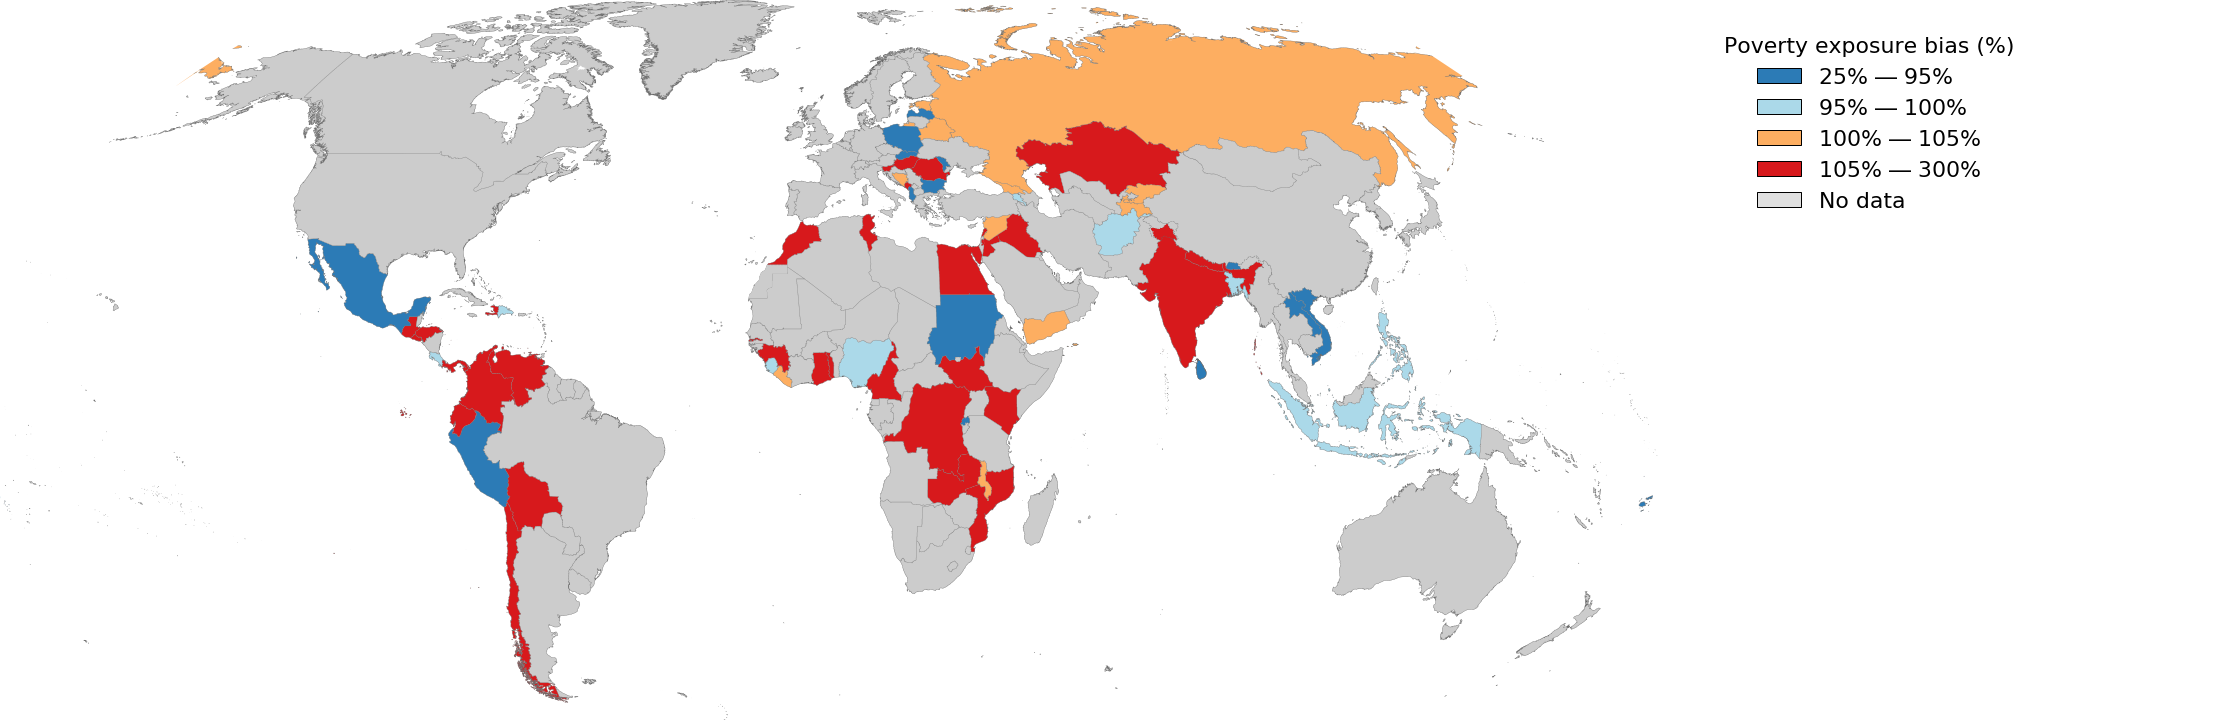

In [13]:
mybins   = [0.25, .95, 1, 1.05,  3]
#we chose bins thare are close to the actual quatiles but make sense when reading by a human

mycolors = ["#2c7bb6", "#abd9e9","#fdae61","#d7191c"] # 3-class RdBu_r

make_map_from_svg(
        series_in=peb, #data 
        svg_file_path="world-original_thin.svg",    #path to blank map
#         svg_file_path  = "world-color.svg",
        outname="peb_4bins",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
        bins = mybins,
        bincolors = mycolors,
        label="Poverty exposure bias (%)",
        outfolder=outfolder_name,
        formater = ".0%",
        verbose=True,
        doPNG=True,
        keepSVG=True
    )

# 3 bins

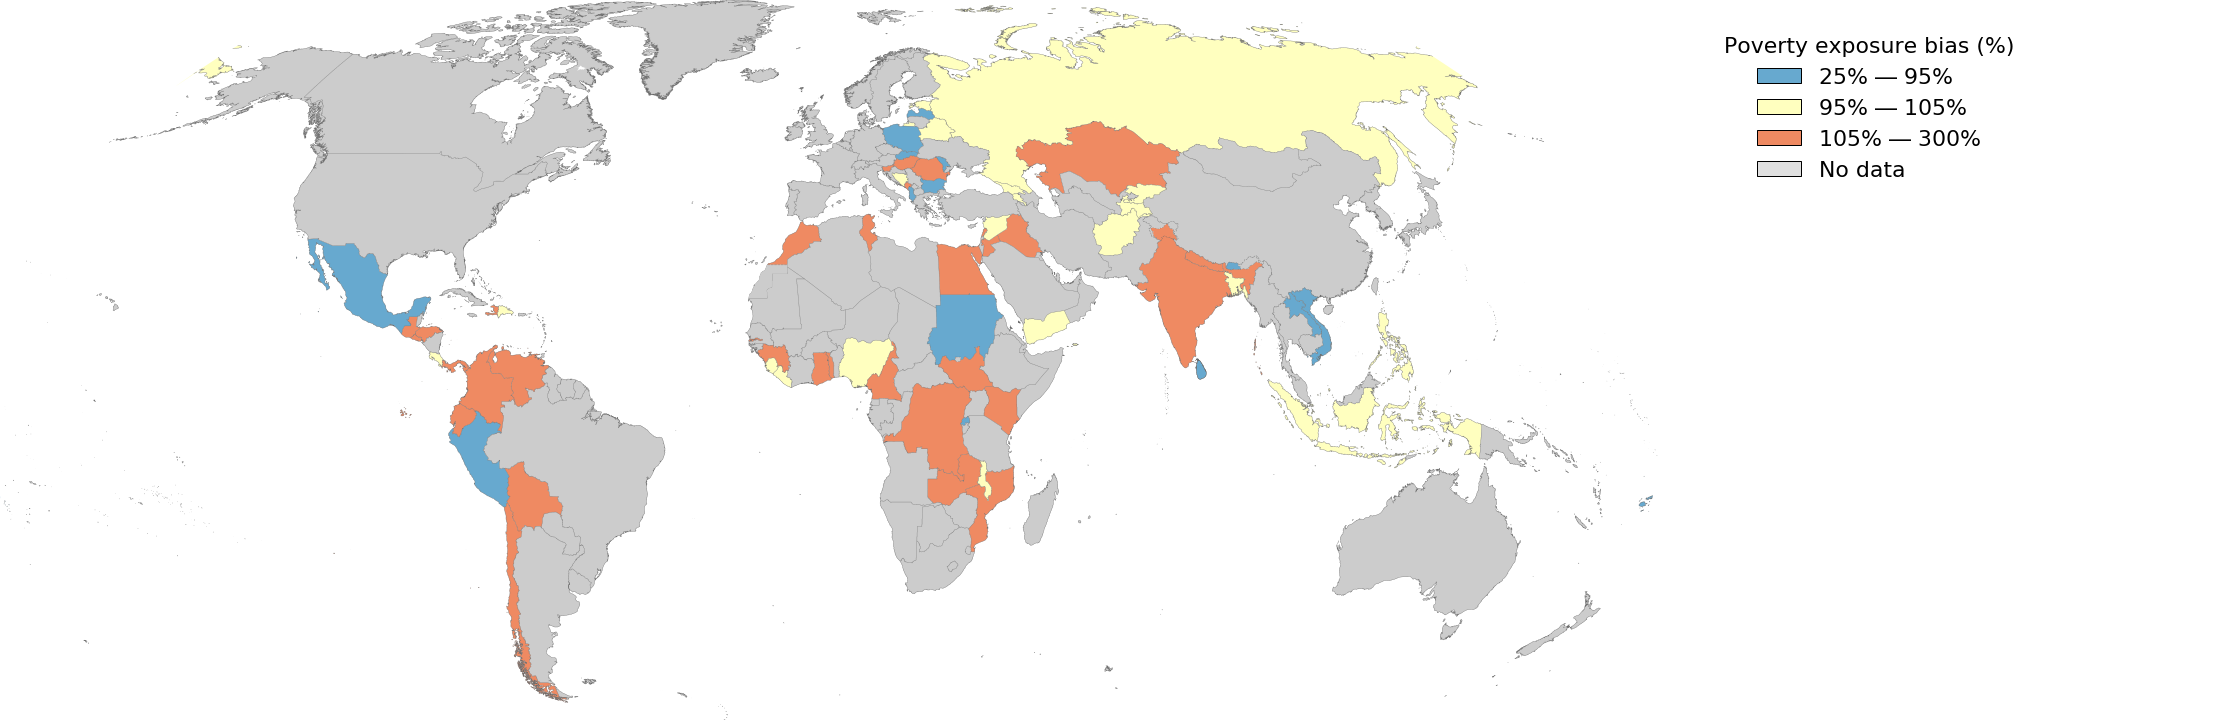

In [14]:
mybins   = [0.25, .95, 1.05,  3]
#we chose bins thare are close to the actual quatiles but make sense when reading by a human

mycolors = ["#67a9cf","#ffffbf","#ef8a62"] # 3-class RdBu_r

make_map_from_svg(
        series_in=peb, #data 
        svg_file_path="world-original_thin.svg",    #path to blank map
#         svg_file_path  = "world-color.svg",
        outname="peb_3bins",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
        bins = mybins,
        bincolors = mycolors,
        label="Poverty exposure bias (%)",
        outfolder=outfolder_name,
        formater = ".0%",
        verbose=True,
        doPNG=True,
        keepSVG=True
    )

# 2 bins

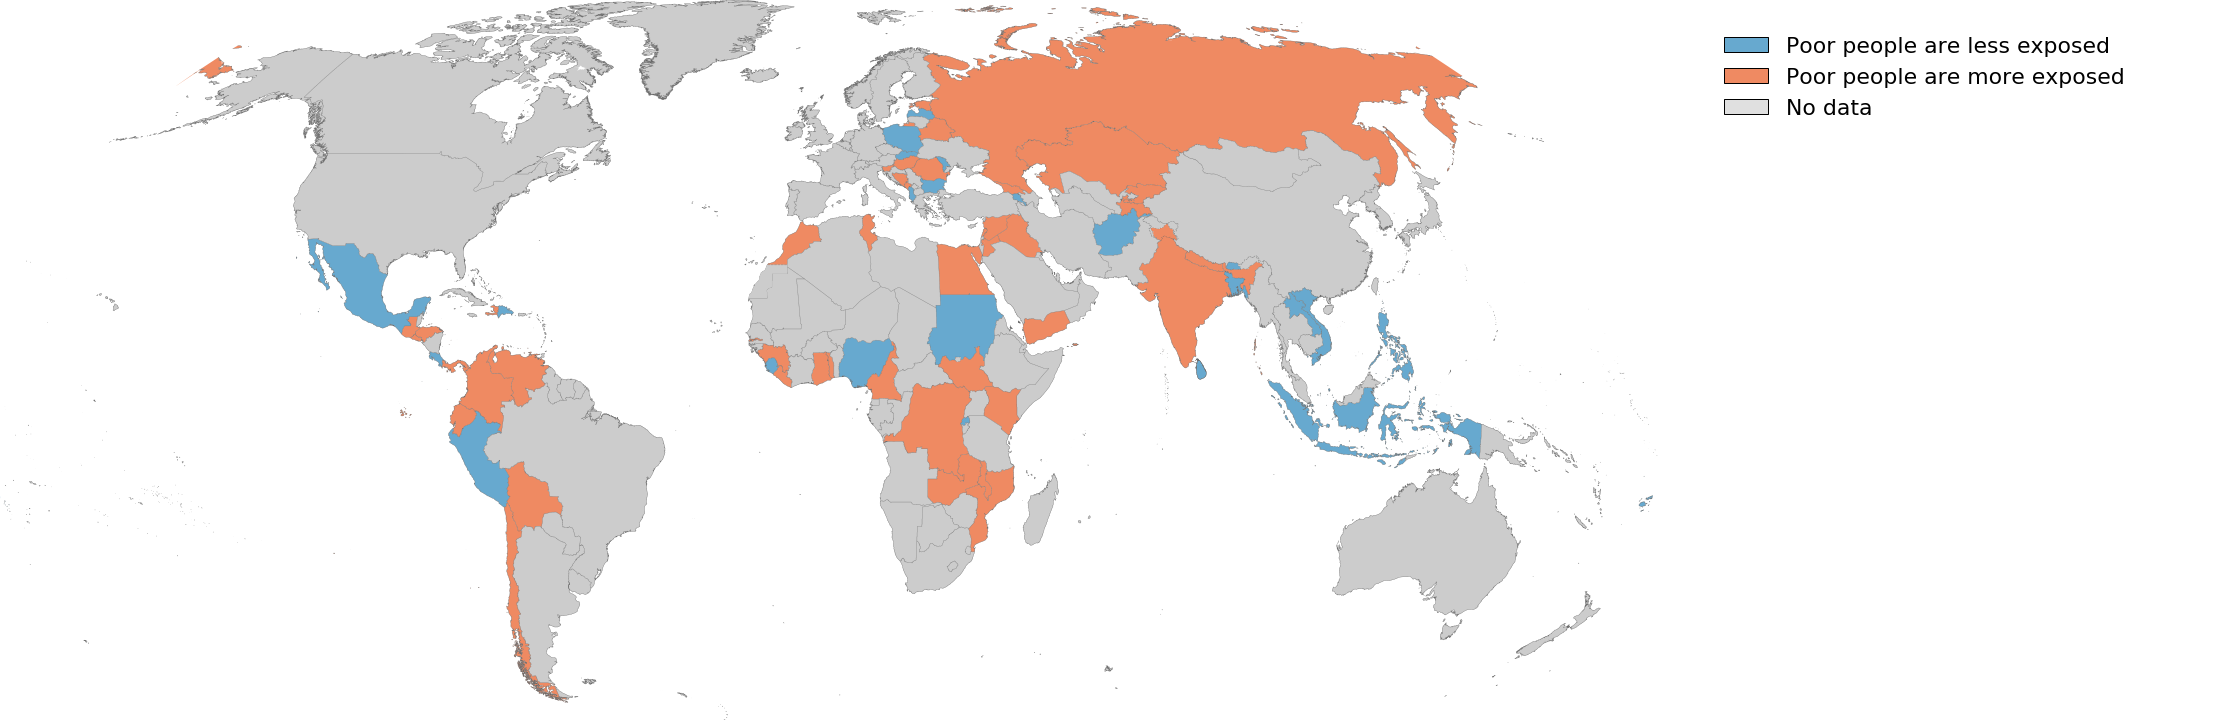

In [15]:
mybins   = [0.25, 1,  3]
#we chose bins thare are close to the actual quatiles but make sense when reading by a human

mycolors = ["#67a9cf","#ef8a62"] # 3-class RdBu_r

make_map_from_svg(
        series_in=peb, #data 
        svg_file_path="world-original_thin.svg",    #path to blank map
#         svg_file_path  = "world-color.svg",
        outname="peb_2bins",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
        bins = mybins,
        bincolors = mycolors,
        label="",
        outfolder=outfolder_name,
        formater = ".0%",
        verbose=True,
        doPNG=True,
        keepSVG=True,
        custom_labels=["Poor people are less exposed", "Poor people are more exposed"]
    )